# Project 2 Comments


- Always double-check your work to make sure that what you are submitting meets the stated requirements for the given Project or Assignment.


- Always double-check your understanding of the definition/meaning of the attributes you have to work with: you may need to do some research (aka, develop some __domain knowledge__).


- Always double-check the results of your analysis: Do your results make sense given what the raw data show? Do your graphics accurately reflect the data used to create them? etc.


- Always double-check written content for spelling, capitalization, and grammar errors: your goal should be a "professional"-style deliverable.


- Always double-check your Jupyter Notebook before submitting to ensure that graphics are displayed as you had expected and that Markdown cells are rendering as you had expected.

<br>
<br>
<br>
<br>
<br>
<br>

Some examples of Project 2 submissions that did a great job of satisfying the stated requirements:

Sara & Michael:https://github.com/jtopor/DAV-5400/blob/master/Project2/S_Ferrari_M_Vizelman_Project2.ipynb

Rachel: https://github.com/jtopor/DAV-5400/blob/master/Project2/R_Ward_Project2.ipynb

<br>
<br>
<br>

# Week 8: Data Cleaning & Preparation: How to Correct Data Quality Problems

- On average, 80% of an analytics professional's time is consumed by data preparation tasks (e.g., data cleansing, data transformation / reformatting, data rearrangement, etc.)


- Missing Data: What to do when data values are missing from your data set?


- Duplicate Data: Should it be removed?


- Adding 'Derived' Data: Add new attributes to a data set based on calculations or other analyses that are applied to some subset of the original set of attributes.


- Discretization/Binning: Simplification of continuous numerical data for analytical purposes.


- Outliers: How to detect and filter them?


- Creating Indicator/Dummy Variables: Convert a categorical variable into a set of "dummy"/"indicator" vectors to enable statistical modeling or machine learning.


- Text Processing: How to find meaningful data within a large set of textual information?

## Missing Data

- What has caused a data value to be missing? Was it a data collection problem? A data entry problem? Other reason?


- What biases might missing values be introducing to the data set? e.g., skewing of mean, median, and mode values; skewing of the distribution of an attribute's values; etc.


- Simple solution: Remove use cases containing missing values. However, what if the rest of the use case contains valid data? What impact does discarding that valid data have on a data set?


- Simple solution # 2: Remove attributes containing missing values. But this solution can also lead to the removal of otherwise valid data from the data set.


- Better (but often still problematic) solution: Fill the missing values with a valid value derived from the actual valid values of the attribute (e.g., mean, mode, median). However, use of the mean, median, or mode to backfill missing values can alter the probability density function (PDF) of the affected attribute. If the PDF changes, what impact does that have on the rest of your otherwise valid data?


- Even better solution: Fill the missing values using an approach that __does not__ change the PDF of the affected attribute. Examples include using a linear model or regression model to calculate an appropriate value based on the valid values that populate the rest of the associated use cases.


- Pandas provides some handy tools for removing and/or filtering missing data


### Removing Missing Data from a Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [3]:
# the dropna() method/function will automatically remove missing items
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

### Removing Missing Data from a DataFrame

In [4]:
# by default, dropna() will remove all rows containing missing data
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [5]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [6]:
# specifying "how = 'all' " will cause dropna() to remove only those rows
# that are missing valid values for all columns
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [7]:
# to drop columns that are all missing values specify 'axis = 1'
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [8]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df


,0,1,2
0,-1.579378,NaN,NaN
1,-2.213925,NaN,NaN
2,-1.782503,NaN,-1.464085
3,-1.345129,NaN,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


In [13]:
# drop all rows containing at least 2 missing values
df.dropna(thresh = 2)

,0,1,2
2,-1.782503,NaN,-1.464085
3,-1.345129,NaN,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


### Filling in Missing Data

- The fillna() function enables filling of all specified missing values

In [15]:
# print df object for easy reference
df

,0,1,2
0,-1.579378,NaN,NaN
1,-2.213925,NaN,NaN
2,-1.782503,NaN,-1.464085
3,-1.345129,NaN,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


In [14]:
# fill all missing values in df with a zero
df.fillna(0)

,0,1,2
0,-1.579378,0.000000,0.000000
1,-2.213925,0.000000,0.000000
2,-1.782503,0.000000,-1.464085
3,-1.345129,0.000000,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


In [16]:
# use a dict if you want to fill missing data in separate columns 
# with different values
# here we are filling missing values in the col having index value 1 with 0.5
# while in the col having index value 2 we fill with 0
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.579378,0.500000,0.000000
1,-2.213925,0.500000,0.000000
2,-1.782503,0.500000,-1.464085
3,-1.345129,0.500000,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


In [17]:
# since fillna() does not fill 'in place' by default, if you aren't worried 
# about preserving the original data use 'inplace = True'
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-1.579378,0.000000,0.000000
1,-2.213925,0.000000,0.000000
2,-1.782503,0.000000,-1.464085
3,-1.345129,0.000000,0.521851
4,0.893182,-1.185305,-1.586487
5,-0.492670,-0.101300,-0.164006
6,-0.662040,0.400159,-0.646522


In [18]:
# filling a column with a mean (or median or mode)
# redefine the df used above
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,2.211033,NaN,NaN
1,-1.349733,NaN,NaN
2,-0.159757,NaN,-0.541421
3,0.237597,NaN,-2.155036
4,1.565485,-1.009162,0.896740
5,-1.474522,-0.257844,-0.724728
6,0.172782,0.747621,1.788507


In [25]:
# calculate the mean of column 1
df.iloc[:, 1].mean()

-0.1731282999175948

In [32]:
# replace the missing values in col 1 with the mean of the non-missing values
# of col 1
df.iloc[:, 1] = df.iloc[:, 1].fillna(value = df.iloc[:, 1].mean())

In [33]:
df

,0,1,2
0,2.211033,-0.173128,NaN
1,-1.349733,-0.173128,NaN
2,-0.159757,-0.173128,-0.541421
3,0.237597,-0.173128,-2.155036
4,1.565485,-1.009162,0.896740
5,-1.474522,-0.257844,-0.724728
6,0.172782,0.747621,1.788507


## Duplicate Data

- What has caused a data to be duplicated? Was it a data collection problem? A data entry problem? Other reason? Is it actually __valid__ data?


- Simple solution: Remove duplicative use cases. What impact does discarding duplicate data have on a data set?

In [34]:
# generate some sample data
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [35]:
# check for duplicate use cases
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [36]:
# drop all duplicative use cases while preserving the first as 'original'
# Note: you can alternatively keep the last instance as 'original' using
# the "keep = 'last'" argument
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


## Discretization & Binning

- Separating data into "bins" or ranges of values is often necessary for analysis purposes.


- How you select your "bin" sizes / ranges can significantly impact the results of your analysis. Bins that are too wide can hide pertinent details. Bins that are too narrow can potentially introduce unnecessary "noise".


- Ideally, bin widths should be equal in size


- Simplistic rule of thumb: __binwidth__ = (max(values) - min(values)) / sqrt(n) where n = number of data values


- Simplistic rule of thumb: __number of bins__ = sqrt(n) where n = number of data values


- In general, use fewer bins for small amounts of data; use more bins for large amounts of data.


### A Simple Example from the PfDA Text

In [37]:
# define some test data
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

# define the bin "cut" values you want to impose on the data
bins = [18, 25, 35, 60, 100]

# apply the binning to the data
cats = pd.cut(ages, bins)

# a special categorical Pandas object is returned. It shows how the bins were
# applied to each data value
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [39]:
# display the integer codes of the bin assignment for each data value
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [40]:
# Display the bin categories
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [41]:
# use the value_counts() function to get the number of items in each bin
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [42]:
# assign your own bin names
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

## Outliers

- Outliers can be detected / identified through the use of boolean tests


- Check for values that fall far outside the range of the standard deviation for the variable, e.g., we know that 95% of all values will fall within 2 standard deviations of the mean for any variable, so values that fall more than 2.5 or 3 standard deviations from the mean might legitimately be considered as potential outliers.


- The multiplier of the standard deviation value to use for outlier detection (i.e., 2x the standard devation? 2.5x? 3x? 5x? 8x? 10x?) will typically be dependent on the nature of the data you are working with: what appears to be an outlier at 2x the standard deviation in one data set might not be in a different data set, so always be sure to __use domain knowledge + empirical testing to find the boundary that works best__. For example, if we use 2x the standard deviation as the boundary, we are implicitly stating that we believe 5% of our data values for the selected column will be outliers, whereas using 3x the standard deviation will identify only approx. 0.3% of the data values for the given variable as outliers.


- For zero bound data (i.e., attributes that we know for a fact cannot have a negative value), check for values < 0

#### A simple example of detecting outliers using standard deviations:

In [2]:
# create a data frame containing 1000 rows of random data
data = pd.DataFrame(np.random.randn(1000, 4))
data.head(10)

,0,1,2,3
0,-0.389762,1.266039,-1.939223,0.246457
1,-0.070566,1.678604,-0.532361,-0.878820
2,-0.396735,0.985781,-0.759359,-0.952532
3,0.012034,1.439375,-0.201989,-0.540671
4,0.409427,-0.108670,-1.532313,-0.284083
5,-0.876221,-0.303799,-0.431414,-1.211225
6,0.966159,-1.002325,-0.027636,-1.667660
7,1.883127,-1.846757,0.002025,-1.725111
8,0.516767,-0.125743,-2.344950,0.835846
9,1.017297,0.170906,-0.118351,0.679274


In [46]:
# let's look at the summary stats: what do they tell us?
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.002061,0.020994,0.023710,0.019514
std,1.019161,0.996273,0.957330,0.996963
min,-4.013690,-2.930877,-2.689949,-3.352538
25%,-0.644026,-0.662671,-0.659793,-0.660707
50%,-0.017752,0.035602,0.017144,0.031525
75%,0.666602,0.688931,0.681268,0.659261
max,3.474706,3.185086,2.876808,3.089680


In [10]:
# find all dataframe rows that have col 2 values whose values are > 
# 2.5 standard deviations from the mean of data in that column
outliers = data[np.abs(data[2] - data[2].mean() ) > (2.5 * data[2].std() )]
outliers

,0,1,2,3
28,-1.214388,0.067501,-2.889439,-0.395065
42,0.369782,-0.236217,-2.606285,1.607417
142,1.170433,1.307480,-3.247059,1.627630
347,0.307147,-0.191777,-2.584559,1.118508
478,-0.475673,-0.237977,-2.525179,0.464189
486,0.249078,-0.248964,2.777880,-0.723483
540,1.170562,0.037858,2.472224,2.606021
606,-0.387087,-0.803543,-2.582613,2.535710
645,1.756919,0.579537,2.527805,0.333334
740,-0.212185,0.503919,-2.521469,0.033103


In [11]:
# we've found a total of 15 outliers
outliers.shape

(15, 4)

Once you've identified your outliers, decide what to do with them: leave them alone? Remove them? Replace with another non-outlier value? You need to decide on the appropriate action based on your __domain knowledge__. Remember: __*outliers are not always invalid*__, but they can have a noticeable effect on your analysis. __There is no single "rule" that applies to how outliers should be dealt with__.

## Creating Indicator/Dummy Variables

- It is not possible to perform numerical statistical analysis using categorical values: categorical variables are not considered to be "numeric" for statistical purposes, even if they are nominally comprised of digits.


- A categorical variable can assume 2 or more (oftentimes many more) values that each have a discernable non-numeric meaning that is distinct from that of any other categorical value that pertains to that same variable.


- To enable statistical analysis of a categorical variable, we must convert the values of the variable into a set of "dummy"/"indicator" vectors whose values are either True (the categorical value is present in the use case) or False (the categorical value is not present in the use case). One dummy variable is needed for each nominal categorical attribute value.

In [49]:
# generate some data to use: the 'key' column is a categorical variable
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [50]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "key"
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [51]:
# merge the dummy variables with the original data: note that
# the original "key" column can optionally be removed as was done here
# but if you have sufficient memory to work with it is usually
# advisable to retain the original column for reference purposes.
# 
# Also note that a prefix of "key" is being appended to each of the 
# valid values taken from the "key" column for purposes of applying a 
# meaningful name to the dummy variable columns
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## Text Processing

- How to parse and/or pattern match within text data?


- __String Object Methods__ in Python are covered in the PfDA text and are easy to understand. Refer to pages 215 - 217.


- Pattern matching is possible via "regular expressions", aka "regex"


- The regular expression "language" provides a universal method for parsing/pattern matching of text data. Regex processing is often used for extracting useful information from HTML, JSON, JS, and other heavily formatted types of data sources.


- The idea behind regex is to use special codes/character sequences as "wildcards" for purposes of finding character strings within a text that conform to a particular syntactical structure.


- Multiple regex reference docs are provided in the Week 8 reading materials within Canvas. You should refer to them for a detailed explanation of regex logic + syntax.


- In Python, we rely on the 're' module for regex functionality

### Regular Expressions

We'll start with a very simple example: splitting a string containing words that are separated by a varying number of whitespace characters

In [2]:
# load the re module
import re

# how to split a string containing a varying number of whitespace characters
# start by generating some data to use
# NOTE: '\t' is the escape sequence for a horizontal whitespace 'tab'
text = "foo    bar\t baz  \tqux"
text

'foo    bar\t baz  \tqux'

In [3]:
# apply the split() function using a regex of '\s+' which describes a 
# string having one or more whitespace characters
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

Now a more complicated (and more realistic) example: Extracting some simple email addresses from a text.

In [4]:
# start by compiling the regex you will use to parse out the email addresses:
# Here you are creating a compiled regex and assigning it the name 'email'
# The regex can then be applied repeatedly throughout your Python code.
# The regex we will use is '\w+@\w+\.[a-z]{3}', which we will decipher a bit
# later
email = re.compile('\w+@\w+\.[a-z]{3}')

In [5]:
# define some sample text containing email addresses
text = "To email Guido, try guido@python.org or the older address guido@google.com."

# now apply the 'email' regex to the sample text to extract ONLY the email
# addresses
email.findall(text)

['guido@python.org', 'guido@google.com']

So what exactly is the regular expression __'\w+@\w+\\.[a-z]{3}'__ going to "pattern match" to? Let's dissect the individual components. 
*(NOTE: For a detailed description of regex syntax, please refer to https://docs.python.org/3/howto/regex.htm) and https://www.machinelearningplus.com/python/python-regex-tutorial-examples/*

- __'\w'__ = Match any alphanumeric character (equiv. to regex [^a-zA-Z0-9]


- __'+'__ = Match one or more of the preceding regex character/code.


- __'@'__ = @ sign


- __'\w'__ = Match any alphanumeric


- __'+'__ = Match one or more of the preceding regex character/code


- __'\\.'__ = A period ('.', which in regex MUST be preceded by the escape character '\\')


- __'[a-z]{3}'__ = exactly 3 lowercase characters in the range of [a-z].

So how might this fail to match to an email address like 'joe.smith@python.net'?

- Since we are only pattern matching to alphanumerics prior to the '@' character, this regex will fail to detect any email addresses that contain a '.' separator prior to the '@' character. 


- Solution: Add a __'\\.\w+'__ to the regex: __'\w+\\.\w+@\w+\\.[a-z]{3}'__

Constructing an effective regex typically requires a fair amount of iterative trial & error effort, e.g., construct what you think will work -> test it -> modify it -> test it again, etc.

Another example: What if we wanted to remove everything __except__ alphanumeric characters from a string?

In [6]:
# create a regex to remove non-alphanumerics from a string
text2 = '**//Regex Exercises// + 42 - 37:?'
# our regex is looking for any non-alphanumeric char: '\W' = any non-alphanumeric
pattern = re.compile('[\W_]+')

# now use the regex to find the non alphanumerics. When found, replace them
# by placing an empty string '' in their location.
# so the call to pattern.sub() is saying: "replace anything in text2 matching the
# regex defined as 'pattern' with an empty string ('').
print(pattern.sub('', text2))

RegexExercises4237


### Vectorized String Functions in Pandas

Pandas has some built-in string manipulation capabilities that allow the user to automatically apply a regex or other string function to each item of a Series or DataFrame column.

Some examples from the PfDA text:

In [7]:
# define some simple data to use
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [8]:
# search the 'data' object for the string 'gmail': the result is a boolean
# vector
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [30]:
# define a regex to separate the email user's name from the web domain name
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)'
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)'

In [31]:
# Use the findall() function to separate each user's email name from the 
# web domain name
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google.com)]
Steve    [(steve, gmail.com)]
Rob        [(rob, gmail.com)]
Wes                       NaN
dtype: object

In [32]:
# extract the user name + web domain into separate data frame columns
data.str.extract(pattern, flags =re.IGNORECASE)

,0,1
Dave,dave,google.com
Steve,steve,gmail.com
Rob,rob,gmail.com
Wes,NaN,NaN


## Case Study: Missing Data in auto-mpg 'horsepower' attribute

In [3]:
# load the data set
auto_df = pd.read_csv("https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week7/auto-mpg.data", delim_whitespace = True, header = None)

# add meaningful column names
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
                   'weight', 'acceleration', 'model', 'origin', 'car_name']

# replace '?' in horsepower column with 'NaN'
auto_df.horsepower.replace('?', np.nan, inplace = True)

# convert the column to numeric
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"])

# replace origin values using a dict
auto_df.origin.replace({1: 'USA', 
                             2: 'Asia',
                             3: 'Europe'}, inplace = True)

auto_df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,amc ambassador dpl


In [6]:
# import seaborn
import seaborn as sns

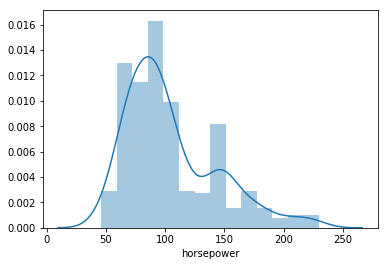

In [5]:
# create a graphic showing the distribution of the non-null horsepower
# values
sns.distplot(auto_df[auto_df["horsepower"].notnull()].horsepower);

In [38]:
# isolate the rows containing the null horsepower values
null_hp = auto_df[auto_df.horsepower.isnull()]
null_hp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,USA,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,Asia,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,USA,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,Asia,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,USA,amc concord dl


How might we come up with a reasonable value for the missing 'horsepower' entries? We could use the mean or median of the non-null values in the 'horsepower' column, but would that make sense? Look at the distribution shown above.

Also look at the mean, median and standard deviation for that variable:

In [7]:
auto_df.horsepower.mean()

104.46938775510205

In [9]:
auto_df.horsepower.median()

93.5

In [8]:
auto_df.horsepower.std()

38.49115993282855

The mean value is 104.47 while the standard deviation is 38.49 and the median is 93.5, so it seems as though we have a fairly dispersed AND right-skewed distribution of possible horsepower values, a fact which is confirmed by the histogram we plotted above.

So while we __could__ use the overal mean or median 'horsepower' value, what are the chances that our "guesstimate" would be a reasonable proxy for the six missing values we have here?

Ideally, for this particular variable we would develop a multiple linear regression model that estimates the horsepower value based on other variables such as model year, mpg, cylinders, displacement and weight (multiple linear regression being appropriate since we would be attempting to estimate an average horsepower rating based on multiple independent variables). However, what other approaches might be both valid and less complicated?

<br>
<br>
<br>

In this instance, we might choose to use the median horsepower value of other autos having similar attributes. Let's try this using the number of cylinders, model year, and country of origin. We'll start with just the first record:

In [18]:
null_hp.iloc[[0]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford pinto


Let's find the median horsepower value for autos cylinders = 4, model = 71 and origin = USA

In [39]:
# lets see how many records we have first:
auto_df[(auto_df.cylinders == 4) & (auto_df.model == 71) & (auto_df.origin == 'USA')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
30,28.0,4,140.0,90.0,2264.0,15.5,71,USA,chevrolet vega 2300
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford pinto
46,22.0,4,140.0,72.0,2408.0,19.0,71,USA,chevrolet vega (sw)
49,23.0,4,122.0,86.0,2220.0,14.0,71,USA,mercury capri 2000
56,26.0,4,91.0,70.0,1955.0,20.5,71,USA,plymouth cricket


As we can see in the above, none of the horsepower values in this list either exceed or equal the overall mean (104.47) or median (93.5) values for the horsepower variable. So perhaps using the median value derived from autos with similar cylinder, model year, and origin values will prove to be a better solution.

In [40]:
# now get their median value
row1_median = auto_df[(auto_df.cylinders == 4) & (auto_df.model == 71) & (auto_df.origin == 'USA')].horsepower.median()
row1_median                      

79.0

The median value of 79 we've found for our subset appears to be much more realistic than either the overall mean (104.47) or median (93.5) values. 

Now implement this logic to fill all 6 of the missing values:

In [47]:
# replace the missing horsepower values using the median horsepower value
# found for autos having the same cylinder, model and origin values
auto_df['horsepower'] = auto_df.groupby(['cylinders', 'model', 'origin']).horsepower.transform(
    lambda x: x.fillna(x.median()))

In [48]:
# Check to see if there are any rows containing null horsepower values
null_hp2 = auto_df[auto_df.horsepower.isnull()]
null_hp2.shape

(0, 9)

In [49]:
# check the first null we looked at earlier to ensure the correct value
# has been added in place of the NaN
auto_df.iloc[[32]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,79.0,2046.0,19.0,71,USA,ford pinto


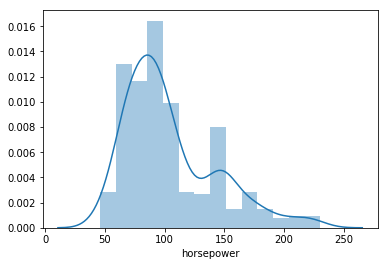

In [53]:
# create a graphic showing the distribution of the non-null horsepower
# values
sns.distplot(auto_df[auto_df["horsepower"].notnull()].horsepower);

In [51]:
# sanity check on other data in data frame
auto_df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,amc ambassador dpl


## Case Study: Detecting Outliers in hflights' 'Departure Delay' attribute

In [2]:
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
hf = pd.read_csv(filename)
hf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [5]:
# get summary statistics for the DepDelay variable
hf.DepDelay.describe()

count    19785.000000
mean         8.297700
std         23.934218
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        780.000000
Name: DepDelay, dtype: float64

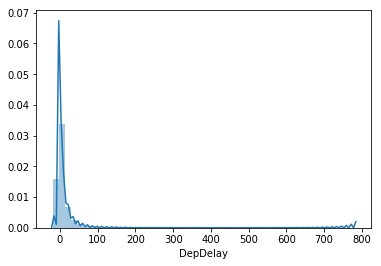

In [8]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(hf[hf["DepDelay"].notnull()].DepDelay);

Note the severe right skew of the distribution for the DepDelay variable: there seems to be obvious evidence of outlier values, and those outliers are likely to be having a tangible impact on both the distribution AND the summary statistics for the variable (e.g., the mean value).

In [14]:
# find all hflight rows that have DepDelay values whose values are > 
# 2.5 standard deviations from the mean of data in that column
depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (2.5 * hf['DepDelay'].std() )]
depdel_outliers.shape

(529, 21)

The results show that we've found 529 outlier values for DepDelay out of the 20,000 rows we have in the data set. 529/20,000 = 2.645% of the total rows have DepDelay values that fall more than 2.5 standard deviations away from the mean.

What if we want to focus on the most extreme outliers for DepDelay? We could try restricting our search to only those DepDelay values that fall more than 5 standard deviations away from the mean:

In [4]:
# find all hflight rows that have DepDelay values whose values are > 
# 5 standard deviations from the mean of data in that column
depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (5 * hf['DepDelay'].std() )]
depdel_outliers.shape

(143, 21)

Even at 5x the standard deviation, we still find 143 outliers. Let's take a look at them:

In [5]:
# we find that the 143 flights falling more than 5 standard deviations from 
# mean DepDeplay value have an average departure delay of more than 3 hours
depdel_outliers.DepDelay.describe()

count    143.000000
mean     180.181818
std       74.350203
min      128.000000
25%      140.000000
50%      161.000000
75%      193.500000
max      780.000000
Name: DepDelay, dtype: float64

We find that the 143 flights falling more than 5 standard deviations from the
mean DepDeplay value have an average departure delay of more than 3 hours and a median departure delay of 161 minutes.

In [6]:
# check the first 10 rows
depdel_outliers.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
309,2011,1,3,1,1801.0,2200.0,B6,622,N206JB,179.0,...,111.0,136.0,HOU,JFK,1428,5.0,9.0,0,NaN,0
936,2011,1,28,5,1516.0,1916.0,CO,1,N77066,480.0,...,326.0,351.0,IAH,HNL,3904,7.0,10.0,0,NaN,0
1029,2011,1,28,5,2100.0,2301.0,CO,670,N39418,241.0,...,102.0,129.0,IAH,SFO,1635,8.0,13.0,0,NaN,0
1148,2011,1,27,4,2017.0,2135.0,CO,59,N75858,138.0,...,143.0,162.0,IAH,DEN,862,6.0,14.0,0,NaN,0
1154,2011,1,27,4,1822.0,1945.0,CO,137,N77295,203.0,...,210.0,234.0,IAH,LAX,1379,9.0,14.0,0,NaN,0
1156,2011,1,27,4,2137.0,2254.0,CO,150,N73278,197.0,...,219.0,242.0,IAH,ONT,1334,5.0,13.0,0,NaN,0
1163,2011,1,27,4,11.0,216.0,CO,209,N17730,245.0,...,137.0,168.0,IAH,PDX,1825,3.0,8.0,0,NaN,0
1171,2011,1,27,4,2237.0,153.0,CO,250,N39726,136.0,...,208.0,227.0,IAH,RDU,1043,11.0,12.0,0,NaN,0
1261,2011,1,27,4,1527.0,2202.0,CO,810,N78009,335.0,...,267.0,137.0,IAH,EWR,1400,140.0,19.0,0,NaN,0
1275,2011,1,27,4,2133.0,2216.0,CO,1411,N37274,43.0,...,134.0,148.0,IAH,AUS,140,5.0,12.0,0,NaN,0


What happens to the summary statistics for the DepDelay variable if we remove these 143 extreme outliers?

In [7]:
# create a temporary series for the DepDelay variable
DepDelay_temp = hf.DepDelay
DepDelay_temp.shape

(20000,)

In [8]:
# now remove the extreme outliers from the temporary series
DD2 = DepDelay_temp.drop(depdel_outliers.index.values)
DD2.shape

(19857,)

In [9]:
# get summary statistics after the extreme outliers have been removed
DD2.describe()

count    19642.000000
mean         7.046329
std         17.899270
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        127.000000
Name: DepDelay, dtype: float64

Note how the mean decreased from 8.2977 to 7.046 while the standard deviation decreased from 23.934218 to 17.899: these are significant changes, i.e.,  the __mean__ value has __decreased__ by __more than 15%__ while the __standard deviation__ value has __decreased__ by __more than 25%__.

Let's look at how the removal of the extreme outliers effected the distribution of the variable:

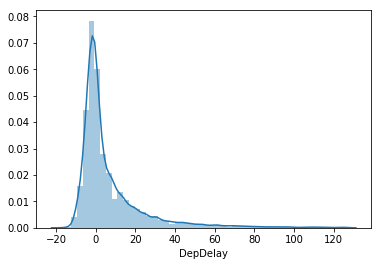

In [20]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(DD2[DD2.notnull()]);

Let's make a facet plot showing how these DepDelay outliers are distributed by UniqueCarrier and Origin:

In [4]:
# lets make a facet plot of Origin/UniqueCarrier/DepDelay/
import seaborn as sns

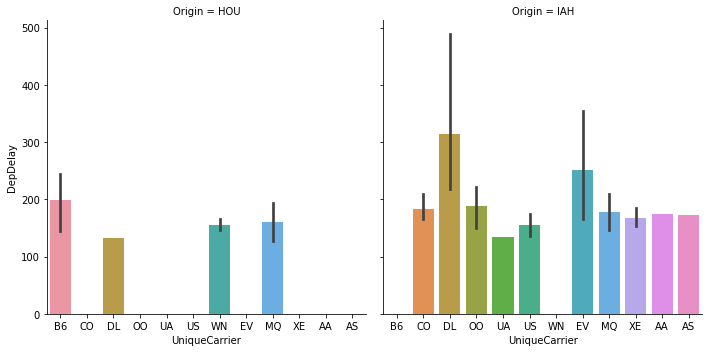

In [29]:
# facet grid for UniqueCarrier vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='UniqueCarrier', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

We see that airlines flying out of IAH appear to experience longer average extreme departure delays than do airlines flying out of HOU. What might be the reason for this? 

We also see that Delta ('DL') seems to experience the highest average severe departure delays of the airlines flying out of IAH. Let's see if we can identify the destinations most impacted by such delays:

In [25]:
# display a list of extreme departure delays for Delta w origin = IAH
depdel_outliers[(depdel_outliers.UniqueCarrier == 'DL') & (depdel_outliers.Origin == 'IAH')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
6507,2011,1,12,3,1038.0,1340.0,DL,1900,N934DL,122.0,...,210.0,218.0,IAH,ATL,689,21.0,13.0,0,NaN,0
6529,2011,1,15,6,941.0,1230.0,DL,1248,N366NB,109.0,...,223.0,236.0,IAH,ATL,689,8.0,15.0,0,NaN,0
6532,2011,1,15,6,1737.0,2035.0,DL,1590,N762NC,118.0,...,487.0,488.0,IAH,ATL,689,6.0,18.0,0,NaN,0


From the table above we can see there were three extreme departure delays for Delta having an origin of IAH, all of them having a destination of 'ATL', and two of them occurred on the same day (1/15/2011).

Let's create a facet plot showing how these extreme departure delays are distributed by the day of the week for each point of origin:

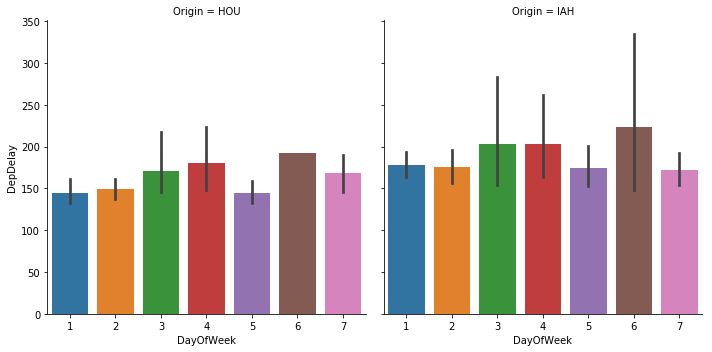

In [6]:
# facet grid for Dest vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='DayOfWeek', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

It appears that Day 6 is the day of the week with the longest average extreme departure delays for both airports.